In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Exercise 4

## (a)

$$ TS(k) = -2 \ln \frac{L(0|k)}{L(\hat{\mu}_S|k)} $$

$$ TS(k) = -2 \ln \left(\frac{\mu_B^k e^{-\mu_B}}{k!}\right) \left(\frac{(\mu_B+\hat{\mu}_S)^k e^{-(\mu_B+\hat{\mu}_S)}}{k!}\right)^{-1} $$

$$ TS(k) = -2 \ln \frac{\mu_B^ke^{\hat{\mu}_S}}{(\mu_B+\hat\mu_S)^k} $$

Knowing that $\hat\mu_S = k-\mu_B$

$$ TS(k) = -2 \ln \frac{\mu_B^k}{k^k} e^{k-\mu_B}= -2 \left( k \ln \frac{\mu_B}{k} + k - \mu_B\right)$$


In [4]:
def get_percentile (mu_b, mu_s=0, n_samples=10000, percentile=95.4):
    def get_test_statistic (k): 
        if k != 0 :
            return -2 * (k * np.log(mu_b/k) + k - mu_b)
        else:
            return 2 * mu_b

    samples = scipy.random.poisson((mu_b + mu_s), n_samples)
    test_statistics = np.zeros(n_samples)
    
    for i in range(n_samples):
        test_statistics[i] = get_test_statistic(samples[i])
    
    return np.percentile(test_statistics, percentile)
    
    
percentile_954 = get_percentile(0.2)
print("95.4 percent level is at", percentile_954)

('95.4 percent level is at', 1.6188758248682005)


## (b)

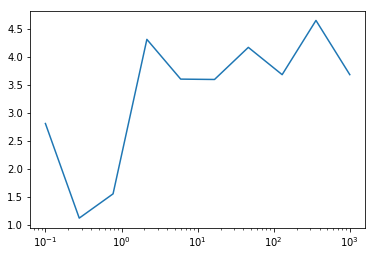

In [13]:
def get_percentiles_for_mu_bs (mu_bs, mu_s=0, n_samples_per_mu_b=1000, percentile=95.4):
    percentiles = np.zeros(mu_bs.size)
    
    for i, mu_b in enumerate(mu_bs):
        percentiles[i] = get_percentile(mu_b, mu_s, n_samples_per_mu_b, percentile)
        
    return percentiles

mu_bs = np.logspace(-1, 3, 10)
percentile_954s = get_percentiles_for_mu_bs(mu_bs)

plt.plot(mu_bs, percentile_954s)
plt.xscale("log")

We see Wilk's theorem only becomes reliable (i.e. our percentile approaches that which we would predict with chi_squared with 1 degrees of freedom) for $mu_B$ (the number of background photons) on the order of $O(10^0)$ to $O(10^1)$.

# Exercise 5

OK so the next few bits of code could have been optimized more (all of it would have fit in one loop). But now it's easier to read. Live with it.


In [47]:
def get_sample_series_of_f(a, xs):
    return 3 * xs + np.random.normal(a, 1, xs.size)

def get_expectation_series_of_f(a, xs):
    return 3 * xs + a

def gen_data_sets(a=10, n_data_sets=1000, n_samples_per_set=10):
    data_sets = np.zeros((n_data_sets, n_samples_per_set))

    for i in range(n_data_sets):
        # Create the data sets
        data_sets[i] = get_sample_series_of_f(a, np.arange(1, 1+n_samples_per_set))
        
    return data_sets

DATA_SETS = gen_data_sets()

print("First data set: ", DATA_SETS[0])

('First data set: ', array([12.98458223, 15.94341997, 18.5339249 , 22.31926006, 24.44013685,
       27.69936101, 30.83832383, 34.84752691, 36.39740281, 39.07496061]))


In [65]:
def get_chi_squared(data_set, expectation_set):
    return np.sum((np.power(data_set - expectation_set, 2)) / np.var(data_set, axis=0))

def get_min_chi_and_a_vals(data_sets):
    a_vals_to_try = np.arange(9, 11, 0.1) # We know it will be close to 10
    a_mins = np.zeros(data_sets.shape[0])
    chi_mins = np.zeros(data_sets.shape[0])
  
    for i in range(data_sets.shape[0]):
        # Calculate the chi squared values
        chi_squared = np.zeros(a_vals_to_try.size)
        for j, a_val in enumerate(a_vals_to_try):
            expectation_set = get_expectation_series_of_f(a_val, np.arange(1, 11))
            chi_squared[j] = get_chi_squared(data_sets, expectation_set)

        # Identify the minimum chi squared value
        min_chi_idx = np.argmin(chi_squared)
        a_mins[i], chi_mins[i] = a_vals_to_try[min_chi_idx], chi_squared[min_chi_idx]
        
    return chi_mins, a_mins
   
CHI_MINS, A_MINS = get_min_chi_and_a_vals(DATA_SETS)

In [66]:
print(A_MINS)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10

In [70]:
def get_left_interval_bdry(a_min, chi_min, data_set, chi, a_step=0.01):
    a_left = a_min
    chi_left = chi_min
    
    while chi_left - chi_min < chi:
        a_left -= a_step
        chi_left =  get_chi_squared(data_set, get_expectation_series_of_f(a_left,  np.arange(1,11)))

    return a_left

def get_right_interval_bdry(a_min, chi_min, data_set, chi, a_step=0.01):
    a_right = a_min
    chi_right = chi_min
    
    while chi_right - chi_min < chi:
        a_right += a_step
        chi_right = get_chi_squared(data_set, get_expectation_series_of_f(a_right,  np.arange(1,11)))

    return a_right

def get_bounds(data_sets, a_mins, chi_mins, true_a=10):
    
    a_bounds_683 = np.zeros((data_sets.shape[0], 2)) # 68.3% confidence interval [.. (left, right) ..]
    a_bounds_954 = np.zeros((data_sets.shape[0], 2)) # 95.4% confidence interval [.. (left, right) ..]
    
    for i, (a_min, chi_min) in enumerate(zip(a_mins, chi_mins)):
        # Construct the left interval
        a_bounds_683[i, 0] = get_left_interval_bdry(a_min, chi_min, data_sets[i], 1) 
        a_bounds_954[i, 0] = get_left_interval_bdry(a_min, chi_min, data_sets[i], 4) 
        
        # Construct the right interval
        a_bounds_683[i, 1] = get_right_interval_bdry(a_min, chi_min, data_sets[i], 1)
        a_bounds_954[i, 1] = get_right_interval_bdry(a_min, chi_min, data_sets[i], 4)
        
    return a_bounds_683, a_bounds_954
    
BOUNDS_683, BOUNDS_954 = get_bounds(DATA_SETS, A_MINS, CHI_MINS)

In [71]:
def get_n_bounds_covering_a(bounds, true_a=10):
    n_bounds = 0

    for [left, right] in bounds:
        n_bounds += (true_a > left and true_a < right)
        
    return n_bounds

COVERS_683 = get_n_bounds_covering_a(BOUNDS_683)
COVERS_954 = get_n_bounds_covering_a(BOUNDS_954)
     

In [74]:
print ("The 68.3 bound covers the true value of a in {0:.0%} of the cases.".format(COVERS_683))
print ("The 95.4 bound covers the true value of a in {0:.0%} of the cases.".format(COVERS_954))

The 68.3 bound covers the true value of a in 67% of the cases.
The 95.4 bound covers the true value of a in 95% of the cases.
